# Maximum Likelihood


The exponential distribution https://en.wikipedia.org/wiki/Exponential_distribution is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake. 

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

In [1]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
%matplotlib inline

###1

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test case 1: `lamb = 2` and `y = np.array([1, 4, 6, 0])`.

Test case 2: `lamb = np.array([1, 0.5, 2, 5])` and  `y = np.array([1.5, 2.1, 3.4, 0])`.

In [2]:
def exponentialNegLogLikelihood(lamb, y):
    """
    Computes the negative log likelihood for a Exppnential random variable.

    Inputs:
    lamb - float or array.  Parameter for the exponential distribution.
    y - float or array.  Observed data.

    Outputs:
    neg_log_lik - float.  The negative log likelihood for data (y) with parameter (lamb).

    """
    neg_log_lik = -np.sum(np.log(lamb)-lamb*y)
    return neg_log_lik

In [3]:
# Test the function
lamb_1 = 2
y_1 = np.array([1, 4, 6, 0])
print("First test result is ", exponentialNegLogLikelihood(lamb_1, y_1), "\n")

lamb_2 = np.array([1, 0.5, 2, 5])
y_2 = np.array([1.5, 2.1, 3.4, 0])
exponentialNegLogLikelihood(lamb_2, y_2)
print("Second test result is ", exponentialNegLogLikelihood(lamb_2, y_2), "\n")

First test result is  19.227411277760222 

Second test result is  7.740562087565899 



In [4]:
# if call the function with lamb=np.array([1,0.5,2,5]) and y=np.array([1.5,2.1,3.4,0])?
lamb_3 = np.array([1,0.5,2,5])
y_3 = np.array([1.5,2.1,3.4,0])
print("This test result is ", exponentialNegLogLikelihood(lamb_3, y_3), "\n")

This test result is  7.740562087565899 



In [5]:
# if $\lambda=0$.
print(exponentialNegLogLikelihood(0, y_1), "\n")
print(exponentialNegLogLikelihood(0, y_2), "\n")

inf 

inf 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


In [6]:
# if $\lambda$ is negative.
print(exponentialNegLogLikelihood(((-1)*lamb_1), y_1), "\n")
print(exponentialNegLogLikelihood(((-1)*lamb_2), y_2), "\n")

nan 

nan 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


1. It will calculate the negative sum of each value of ${log}({λ}_{i})$ - ${λ}_{i}*{y}_{i}$.

2. When I set $λ$ to 0, it got a runtime warning because divide by zero is not invalid in log; when I set $λ$ to negative, it got not a number because the value is also invalid in log.

---

### 2

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test case:  
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

In [7]:
def exponentialRegressionNegLogLikelihood(b, X, y):
    """
    Computes the negative log-likelihood for a exponential regression.

    Inputs:
    b - array.  Coefficients for the exponential regression
    X - array.  Design matrix.
    y - array.  Observed outcomes.

    Outputs:
    log_lik - float.  Negative log likelihood for the exponential regression with coefficients b.

    """
    lamb = np.exp((-1)*np.dot(X, b))
    neg_log_lik = exponentialNegLogLikelihood(lamb, y)
    return neg_log_lik

In [8]:
# Test your function 
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
print(exponentialRegressionNegLogLikelihood(b, X, y), "\n")

26.60556862451103 




1. There may also be a too large lambda vector value causing a too large neg_log_lik value.  

2. Exponential function can help avoid 0 and negative values of $λ$ which is invalid. 

---
###4

Define a function called `Prediction` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Test case:   
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`

In [9]:
# Definition of the Prediction
def Prediction(b, X):
    yhat = np.exp(np.dot(X, b))
    return yhat

In [10]:
# Test the function
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
print(Prediction(b, X), "\n")

[ 2980.95798704 66171.16016838  1808.04241446] 



---
###5

Define a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test case:   
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

In [11]:
# Define Model_fit
def Model_fit(X, y):
    """
    Fits a exponential regression given data and outcomes.

    Inputs:
    X - array.  Design matrix
    y - array.  Observed outcomes

    Outputs:
    betas_est - array.  Coefficients which maximize the negative log-liklihood.
    """
    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.full(len(X[0]), 1)
    # Minimize the appropriate likelihood function
    mle = minimize(exponentialRegressionNegLogLikelihood, beta_start, args=(X, y), method = "Powell", tol = 1e-8)
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

In [12]:
# Show the code to find estimated b
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
Model_fit(X, y)

array([ 1.1303665 , -0.67600793])

###6

Use the data `exponential_regression.csv` to fit a exponential regression using the functions that you already have created. In this data, $y$ is measured in time units.

Plot a scatterplot of the data that includes the model prediction over $x \in [-2.14, 2.14]$.

In [13]:
# Loading in the data.

df = pd.read_csv('exponential_regression.csv', sep=';')

# Create the design matrix
x = df.x.values.reshape(-1, 1)
X = np.c_[np.ones(x.shape[0]), x]
y = df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = Model_fit(X, y)

print("\n")
print("Coefficients which maximize the negative log-liklihood: ", betas)



Coefficients which maximize the negative log-liklihood:  [ 0.07120226 -1.75117879]


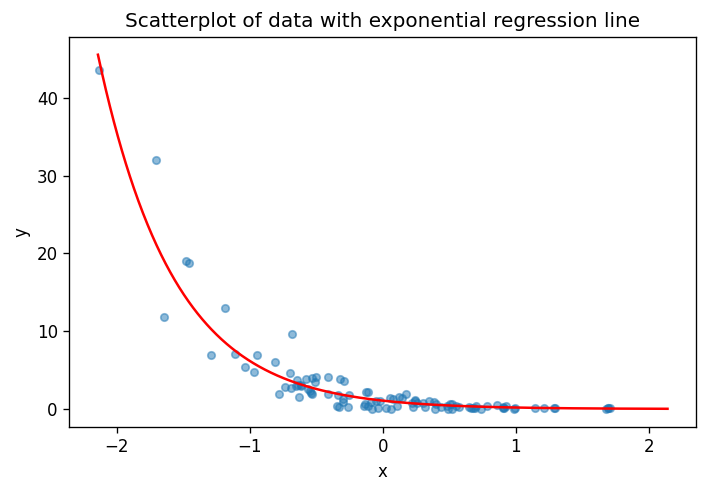

In [14]:
# Scatterplot the data. 
fig, ax = plt.subplots(dpi=120)
df.plot.scatter("x", "y", ax=ax, alpha=0.5)

exponentialRegressionNegLogLikelihood(betas, X, y)

b0, b1 = Model_fit(X, y) 

# Create the new data to graphic the prediction
newx = np.linspace(-2.14, 2.14, 1001).reshape(-1, 1)
newX = np.c_[np.ones(newx.shape[0]), newx]


# Predictions on the new data
y_predicted = np.exp(b0 + b1 * newx)

# Finally, plot the predictions on the same graph
ax.plot(newx, y_predicted, color="red")

plt.tight_layout()
plt.title("Scatterplot of data with exponential regression line")
plt.savefig("exponential_regression.png")

###7

Fit a linear regression (ordinary least squares) to the data, and obtain parameter estimates and and plot the predictions over the same range.


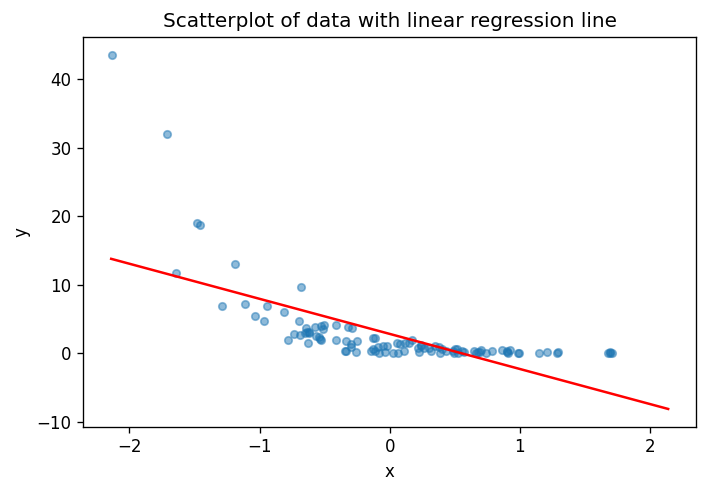

In [15]:
# fit the linear regression model
model = LinearRegression()
ols_fit = model.fit(X, y)

# Make predictions on the new data
y_predicted = model.predict(newX)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi=120)
df.plot.scatter("x", "y", ax=ax, alpha=0.5)

ax.plot(newx, y_predicted, color="red")

plt.tight_layout()
plt.title("Scatterplot of data with linear regression line")
plt.savefig("exponential_regression_sklearn.png")

###8

When the value of y is measured in time units, y could not be a value smaller than 0. However, the linear regression line can make predictions for negative vlue of y, this can be a problem that we predict negative time data, and a exponential regression model helps to avoid this situation happens.